<a href="https://colab.research.google.com/github/DSpike/Iris_Plant_Classification/blob/main/Iris_Plant_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
#importing essential libraries (eg. Dataframe manipulation, N-Dimensial Array Manipulation,Data Preprocessing...)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing  import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model



In [3]:
#Mounting my google drive containing my dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [92]:
#reading my Iris data set using panda library and specifing the column names that are going to be used
columns = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Species"]
df=pd.read_csv('/content/drive/My Drive/Iris.csv',header=0,names=columns )

In [93]:
#preprocessing of the raw data:removing target feature
x=df.drop('Species',axis=1,inplace=False).values
y=df['Species'].values


In [94]:
#Label encoding of the target three features namely;Iris-setosa, Iris-versicolor,Iris-virginica
from sklearn.preprocessing import LabelEncoder
labelEndoder=LabelEncoder()
y_LabelEncoded=labelEndoder.fit_transform(y)

In [95]:
#splitting of our data in to training, testing and validation sets
from sklearn.model_selection import train_test_split
x_main,x_test,y_main,y_test=train_test_split(x,y_LabelEncoded,test_size=0.1,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_main,y_main,test_size=0.1,random_state=42)

In [96]:
#inorder the ensure standard distribution of feature data
sandardize=StandardScaler()
x_train=sandardize.fit_transform(x_train)
x_val=sandardize.transform(x_val)
x_test=sandardize.transform(x_test)


In [97]:
#building our deep ANN model
model = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(10, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 classes for the Iris dataset
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [98]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

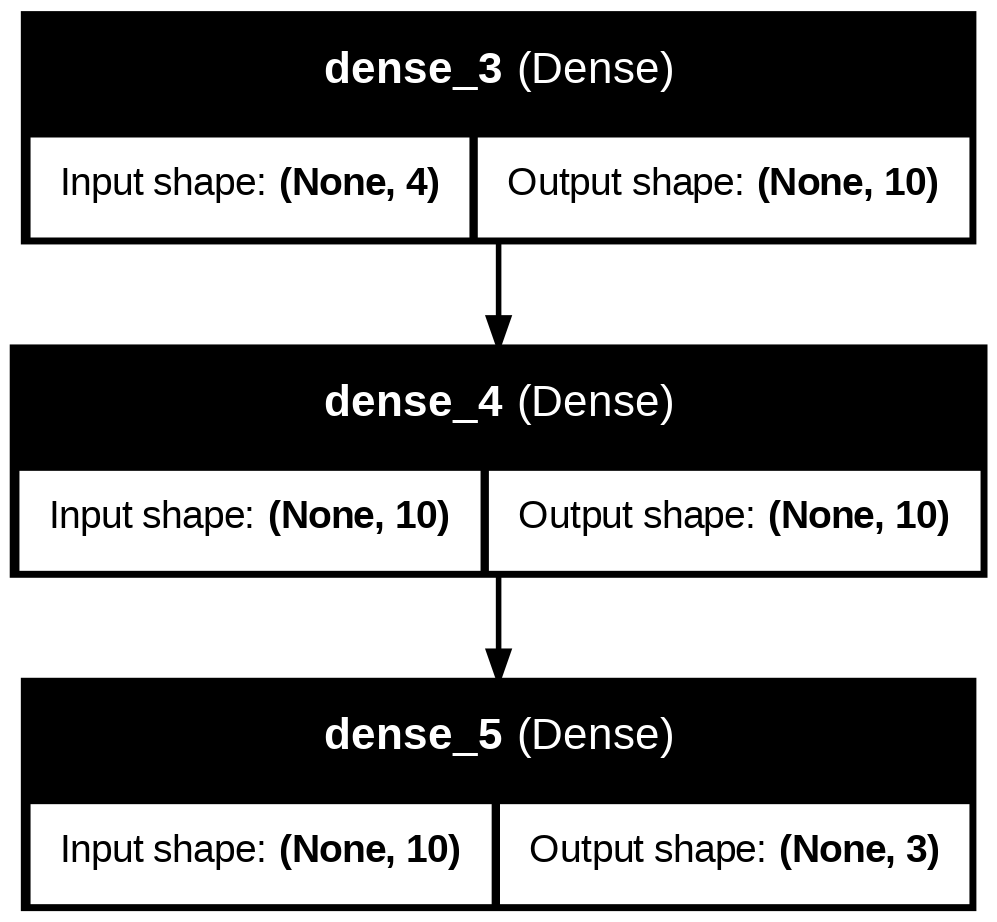

In [99]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [100]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [101]:
# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=5, validation_data=(x_val, y_val))

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.0619 - loss: 1.1544 - val_accuracy: 0.0714 - val_loss: 1.1259
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2913 - loss: 1.0639 - val_accuracy: 0.3571 - val_loss: 1.0521
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5198 - loss: 0.9604 - val_accuracy: 0.3571 - val_loss: 0.9672
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6117 - loss: 0.8135 - val_accuracy: 0.4286 - val_loss: 0.9112
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6866 - loss: 0.7796 - val_accuracy: 0.5000 - val_loss: 0.8780
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6927 - loss: 0.7153 - val_accuracy: 0.5000 - val_loss: 0.8516
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7505 - loss: 0.7213 - val_accuracy: 0.5714 - val_loss: 0.8278
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7345 - loss: 0.7002 - val_accuracy: 0.6429 - 

In [102]:
# Evaluate the model on the test set
from sklearn.metrics import accuracy_score
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9333 - loss: 0.0869
Test Accuracy: 0.9333


In [105]:
# Make predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
from sklearn.metrics import precision_score, recall_score, roc_auc_score, classification_report
# Compute evaluation metrics
precision = precision_score(y_test, predicted_classes, average='weighted')
recall = recall_score(y_test, predicted_classes, average='weighted')
roc_auc = roc_auc_score(pd.get_dummies(y_test), keras.utils.to_categorical(predicted_classes))

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'AUC: {roc_auc:.4f}')

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, predicted_classes, target_names=labelEndoder.classes_))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Precision: 0.9500
Recall: 0.9333
AUC: 0.9583

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       1.00      0.83      0.91         6
 Iris-virginica       0.75      1.00      0.86         3

       accuracy                           0.93        15
      macro avg       0.92      0.94      0.92        15
   weighted avg       0.95      0.93      0.94        15

